# DX 601 Final Project

## Introduction

In this project, you will practice all the skills that you have learned throughout this module.
You will pick a data set to analyze from a list provided, and then perform a variety of analysis.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx500-examples
* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [1]:
import math
import sys

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Iris data set](https://archive.ics.uci.edu/dataset/53/iris) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/iris))
* [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/_deprecated_breast_cancer_wisconsin))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - white subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_white))


The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [7]:
# YOUR CODE HERE
wine_quality = pd.read_csv("wine_quality_white.tsv.gz", sep="\t")
wine_quality.sample(n=10)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
1810,6.6,0.36,0.21,1.50,0.049,39.0,184.0,0.99280,3.18,0.41,9.9,6
3375,7.8,0.22,0.26,9.00,0.047,38.0,132.0,0.99700,3.25,0.53,10.2,6
4819,5.7,0.40,0.35,5.10,0.026,17.0,113.0,0.99052,3.18,0.67,12.4,6
630,7.0,0.23,0.42,18.05,0.050,35.0,144.0,0.99990,3.22,0.42,8.8,5
1416,6.6,0.23,0.26,1.30,0.045,16.0,128.0,0.99340,3.36,0.60,10.0,6
4821,7.0,0.24,0.47,1.30,0.043,18.0,131.0,0.99176,3.19,0.45,11.0,6
2066,7.7,0.28,0.29,4.30,0.051,25.0,142.0,0.99390,3.16,0.39,10.2,5
3480,6.5,0.30,0.27,4.00,0.038,37.0,97.0,0.99026,3.20,0.60,12.6,8
1486,6.2,0.15,0.49,0.90,0.033,17.0,51.0,0.99320,3.30,0.70,9.4,6
1043,7.5,0.33,0.48,19.45,0.048,55.0,243.0,1.00100,2.95,0.40,8.8,5


YOUR ANSWERS HERE

### Problem 2 (10 points)

List all the columns in the data set, and describe each of them in your own words.
You may have to search to learn about the data set columns, but make sure that the descriptions are your own words.

In [10]:
# YOUR CODE HERE
wine_column = wine_quality.columns
wine_column

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'target'],
      dtype='object')

YOUR ANSWERS HERE
|         | Variable | Definition |
|:--------|:-------- | :----------|
|1        | fixed acidity | non-volatile acid levels |
|2        | volatile acidity | acetic acid levels |
|3        | citric acid | level of citric flavors |
|4        | residual sugar | sugar level left after fermentation |
|5        | chlorides | salt content |
|6        | free sulfur dioxide | SO2 levels (protects wine from bateria and oxidation) |
|7        | total sulfur dioxide | SO2 total amount |
|8        | density | heaviness of wine  |
|9        | pH | acidity levels |
|10       | sulphates | wine preservative and flavor enhancer. |
|11       | alcohol | Alcohol percentage |
|12       | target | human rating of wine from 0-10 |


### Problem 3 (15 points)

Plot histograms of each column.
For each column, state the distribution covered in this module that you think best matches that column.

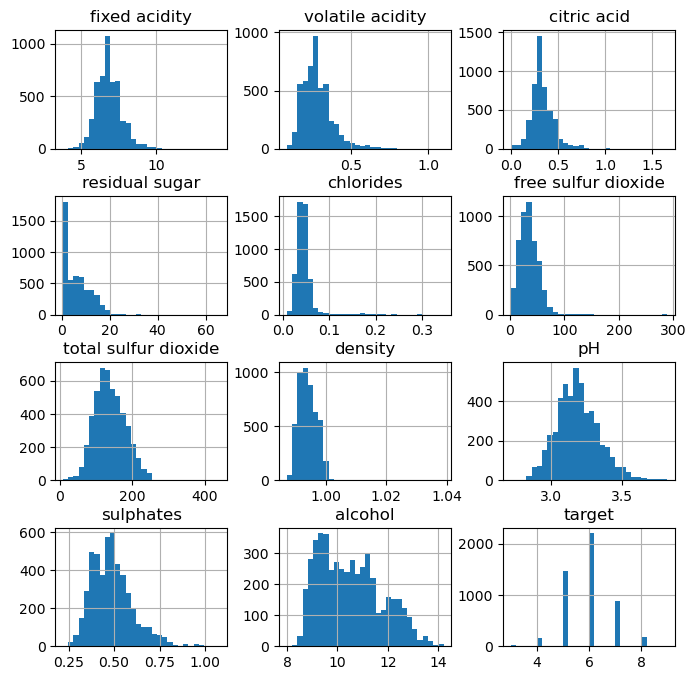

In [18]:
# YOUR CODE HERE
wine_quality.hist(figsize=(8, 8), bins=30)
plt.subplots_adjust(hspace=0.4)

YOUR ANSWERS HERE
1. Fixed Acidity - Gaussian, a little right skewed exponential
2. Volatile Acidity - Right skewed distribution exponential
3. Citric Acid - Gaussian, slight right skewed exponential
4. Residual Sugar - Right skewed distribution exponential
5. Chlorides - Right skewed distribution exponential
6. Free Sulfur Dioxide - Close Gaussian, but right skewed exponential
7. Total Sulfur Dioxide - Gaussian distribution
8. Density - Gaussian distribution
9. pH - Gaussian distribution
10. Sulphates - close gaussian, but right skewed exponential
11. Alcohol - Right skewed distribution exponential
12. Target - Discrete gaussian distribution 


### Problem 4 (20 points)

Plot each pair of an input column and the output column. Classify each pair of input column and the output column as being independent or not. Describe in words why you think that was the case.

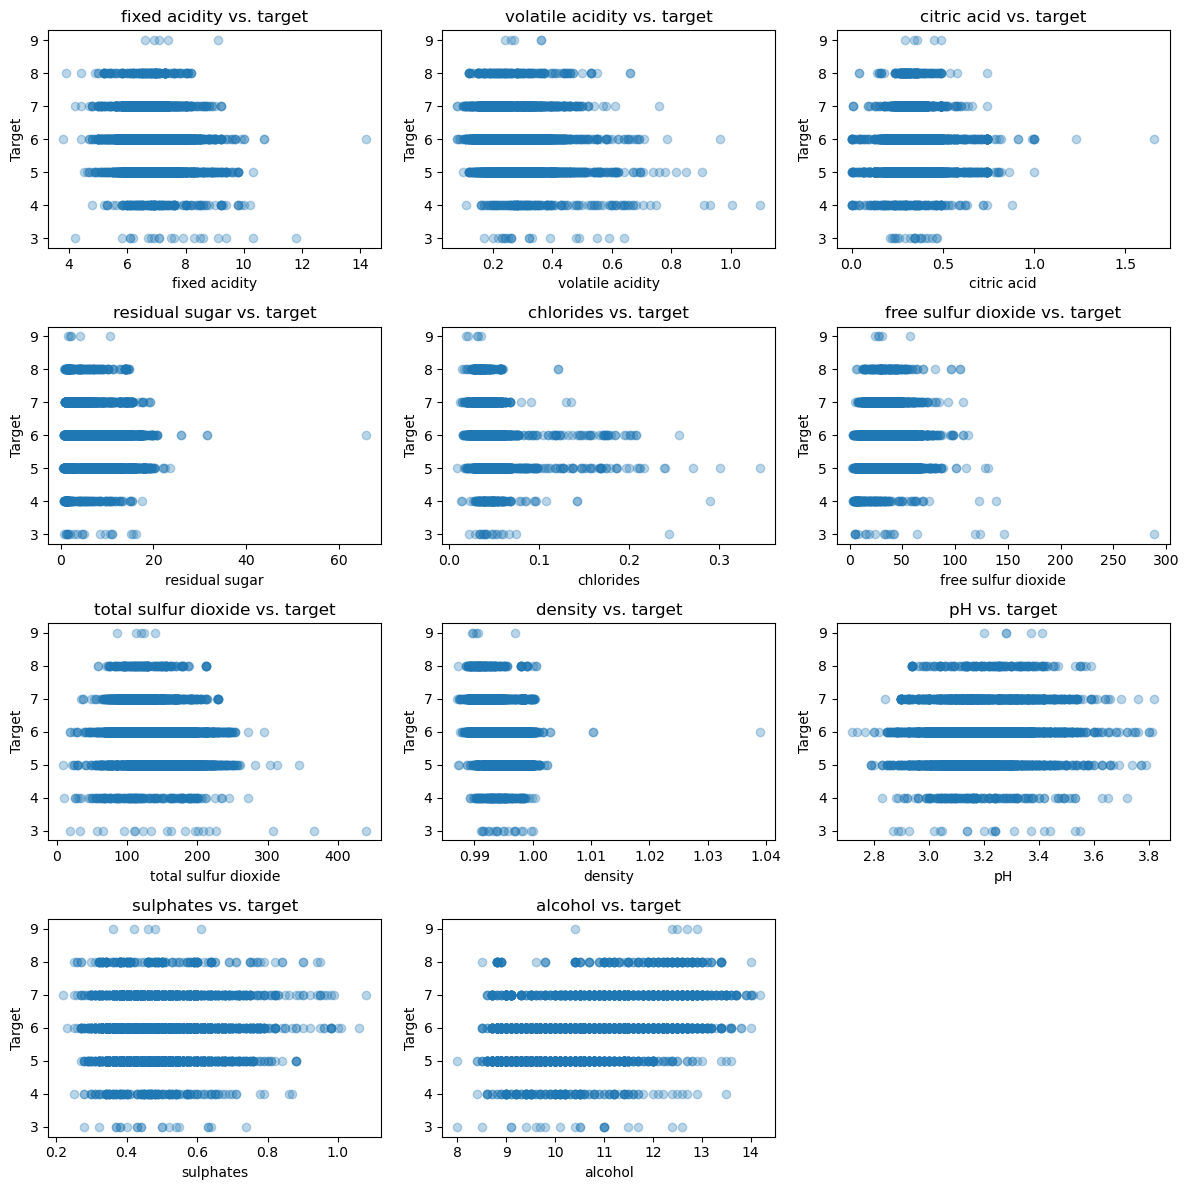

In [55]:
# YOUR CODE HERE
input_col = wine_quality.drop(columns="target")
plt.figure(figsize=(12, 12))
n_col = 3
for i, col in enumerate(input_col.columns, 1):
    plt.subplot(4, 3, i)
    plt.scatter(wine_quality[col], wine_quality["target"], alpha=0.3)
    plt.ylabel("Target")
    plt.xlabel(col)
    plt.title(f'{col} vs. target')
plt.tight_layout()

YOUR ANSWERS HERE
1. Fixed Acidity - Dependent | There is a trend of lower fixed acidity, higher target
2. Volatile Acidity - Dependent | There is a trend of lower volatile acidity, higher target
3. Citric Acid - Dependent | There is a trend of lower volatile acidity, higher target
4. Residual Sugar - Independent | No patterns or trends 
5. Chlorides - Dependent | Higher levels of chloride reduces target
6. Free Sulfur Dioxide - Independent | Free Sulfur Dioxide doesn't seem to affect target value
7. Total Sulfur Dioxide - Independent | There is no trend and total sulfur dioxide doesn't help determine target
8. Density - Dependent | Higher density tends to have a lower target
9. pH - Independent | Range of pH is typically in the same for all target
10. Sulphates - Dependent | Higher Sulphates have a higher target
11. Alcohol - Dependent | Higher alcohol has a higher target

### Problem 5 (20 points)

Build an ordinary least squares regression for the target using all the input columns.
Report the mean squared error of the model over the whole data set.
Plot the actual values vs the predicted outputs to compare them. 

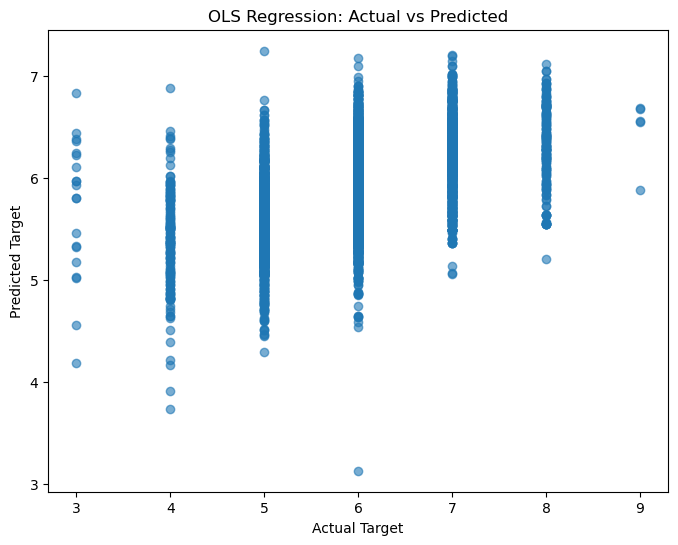

In [70]:
# YOUR CODE HERE
from sklearn.linear_model import LinearRegression

def mean_square_error(y, y_predict):
    return np.mean((y - y_predict)**2)

model = LinearRegression()
model.fit(input_col, wine_quality["target"])
y_pred = model.predict(input_col)
mse = mean_square_error(wine_quality["target"], y_pred)

plt.figure(figsize=(8,6))
plt.scatter(wine_quality["target"], y_pred, alpha=0.6)
plt.xlabel("Actual Target")
plt.ylabel("Predicted Target")
plt.title("OLS Regression: Actual vs Predicted")
plt.show()


YOUR ANSWERS HERE

In [188]:
print("Mean Squared Error is:", mse)

Mean Squared Error is: 0.63541378632608


### Problem 6 (20 points)

Which input column gives the best linear model of the target on its own?
How does that model compare to the model in problem 5?


In [90]:
# YOUR CODE HERE
mse_result = {}
for i, col in enumerate(input_col.columns, 1):
    X = wine_quality[[col]]
    model = LinearRegression()
    model.fit(X, wine_quality["target"])
    y_pred = model.predict(X)
    mse = mean_square_error(wine_quality["target"], y_pred)
    mse_result[col] = mse

best_col = min(mse_result, key=mse_result.get)
print(mse_result)
print("Best predictor is", best_col, mse_result[best_col])


{'fixed acidity': np.float64(0.7740643377514038), 'volatile acidity': np.float64(0.7544611777913112), 'citric acid': np.float64(0.7841290419696331), 'residual sugar': np.float64(0.7767290354362435), 'chlorides': np.float64(0.7496341230508563), 'free sulfur dioxide': np.float64(0.7841433561228635), 'total sulfur dioxide': np.float64(0.7602516302012772), 'density': np.float64(0.7102265148403777), 'pH': np.float64(0.776443165059832), 'sulphates': np.float64(0.7819360335229564), 'alcohol': np.float64(0.63541378632608)}
Best predictor is alcohol 0.63541378632608


YOUR ANSWERS HERE

Finding the best linear model is by comparing the mean squared error and finding the lowest value. In this case the lowest mean squared error is "Alcohol"

### Problem 7 (20 points)

Pick and plot a pair of input columns with a visible dependency.
Identify a split of the values of one column illustrating the dependency and plot histograms of the other variable on both sides of the split.
That is, pick a threshold $t$ for one column $x$ and make two histograms, one where $x < t$ and one where $x \geq t$.

These histograms should look significantly different to make the dependency clear.
There should be enough data in both histograms so that these differences are unlikely to be noise.
Also make sure that the horizontal axis is the same in both histograms for clarity.

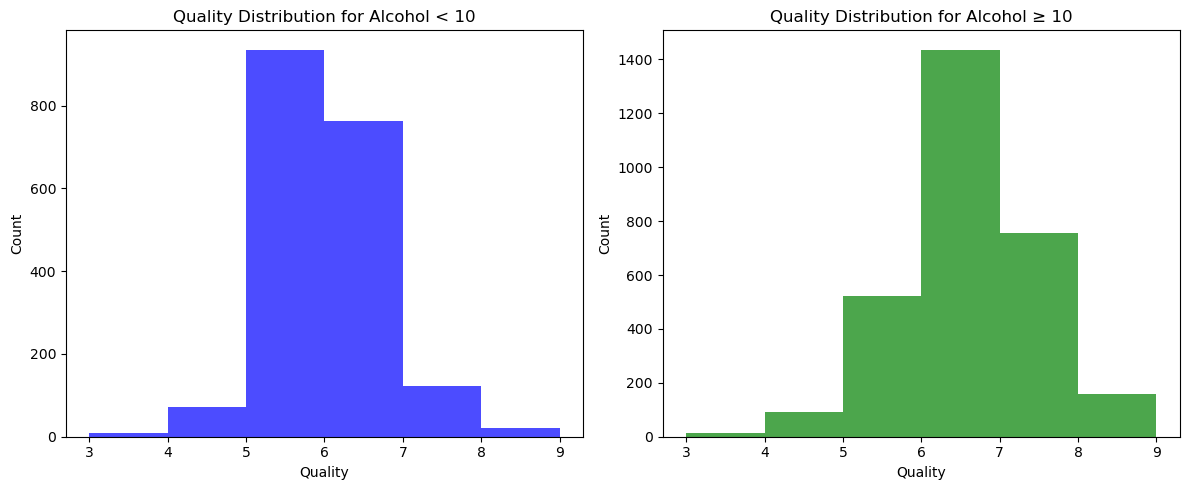

In [ ]:
# YOUR CODE HERE
x = wine_quality['alcohol']
y = wine_quality['target']
t = 10

low_group = y[x < t]
high_group = y[x >= t]

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(low_group, bins=range(int(y.min()), int(y.max())+1), color='blue', alpha=0.7)
plt.title(f'Quality Distribution for Alcohol < {t}')
plt.xlabel('Quality')
plt.ylabel('Count')

plt.subplot(1,2,2)
plt.hist(high_group, bins=range(int(y.min()), int(y.max())+1), color='green', alpha=0.7)
plt.title(f'Quality Distribution for Alcohol ≥ {t}')
plt.xlabel('Quality')
plt.ylabel('Count')

plt.tight_layout()


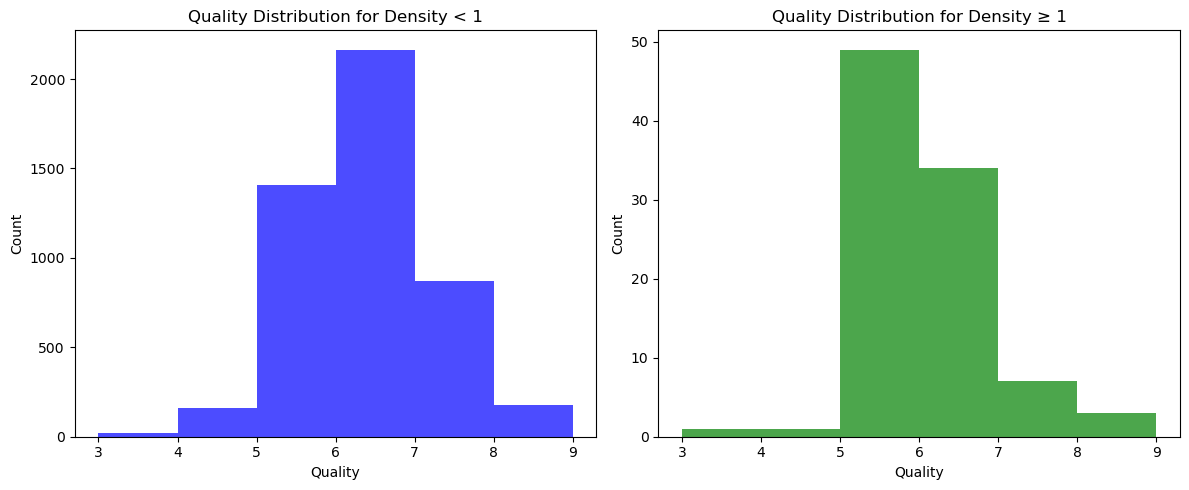

In [229]:
x = wine_quality['density']
y = wine_quality['target']
t = 1

low_group = y[x < t]
high_group = y[x >= t]

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(low_group, bins=range(int(y.min()), int(y.max())+1), color='blue', alpha=0.7)
plt.title(f'Quality Distribution for Density < {t}')
plt.xlabel('Quality')
plt.ylabel('Count')

plt.subplot(1,2,2)
plt.hist(high_group, bins=range(int(y.min()), int(y.max())+1), color='green', alpha=0.7)
plt.title(f'Quality Distribution for Density ≥ {t}')
plt.xlabel('Quality')
plt.ylabel('Count')

plt.tight_layout()


YOUR ANSWERS HERE

Here you can see that the split at alcohol @ 10 shifts majority of the quality from < 6 to > 5
Here you can see that the split at alcohol @ 1 shifts majority of the quality from > 5 to < 5 

### Problem 8 (40 points)

Perform principal components analysis of the input columns.
Compute how much of the data variation is explained by the first half of the principal components.
Build a linear regression using coordinates computed from the first half of the principal components.
Compare the mean squared error of this model to the previous model.
Plot actual targets vs predictions again. 

This problem depends on material from week 13.

Variance explained by first half: 0.7282747359911348
MSE of half: 0.6336621057618057


/opt/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


Text(0.5, 1.0, 'PCA: Actual vs. Predicted')

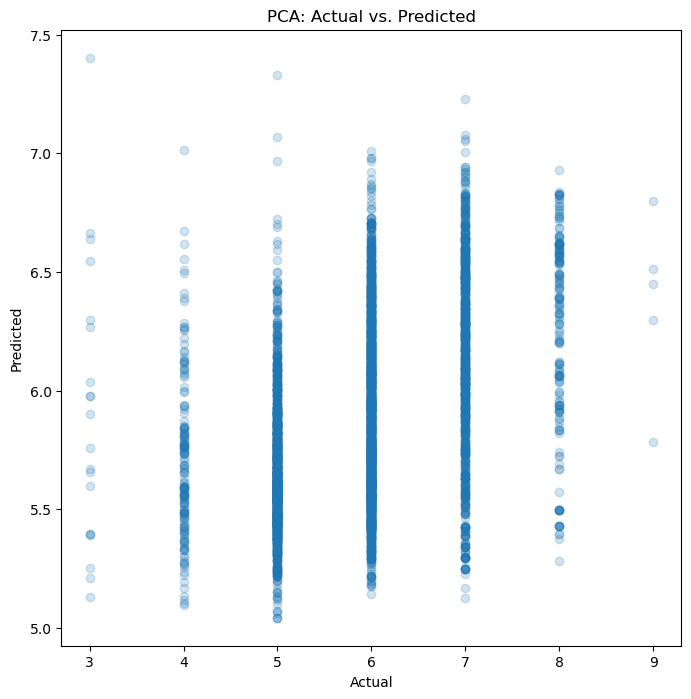

In [ ]:
# YOUR CODE HERE

wine_pca_columns = [c for c in wine_quality.columns if wine_quality[c].dtype.name == 'float64']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA()
pca.fit_transform(X_scaled)
wine_components = pd.DataFrame(pca.components_, columns=wine_pca_columns)

explained_var_ratio = pca.explained_variance_ratio_
half = len(explained_var_ratio) // 2

variance_explained_first_half = explained_var_ratio[:half].sum()
print("Variance explained by first half:", variance_explained_first_half)

wine_pcs = pca.transform(wine_quality[wine_pca_columns])
X_half = wine_pcs[:, :half]
y = wine_quality['target']

model = LinearRegression()
model.fit(X_half, y)
y_predict_half = model.predict(X_half)

mse_half = mean_square_error(y, y_predict_half)
print("MSE of half:", mse_half)

plt.figure(figsize=(8, 8))
plt.scatter(y, y_predict_half, alpha=0.2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("PCA: Actual vs. Predicted")


YOUR ANSWERS HERE

In [235]:
print("Variance explained by first half:", variance_explained_first_half)
print("MSE of half:", mse_half)
print("Previous MSE:", mse)
print("Comparing MSE difference:", mse - mse_half , "difference")

Variance explained by first half: 0.7282747359911348
MSE of half: 0.6336621057618057
Previous MSE: 0.63541378632608
Comparing MSE difference: 0.0017516805642743272 difference


### Problem 9 (20 points)

What pair of input columns has the highest correlation?
How is that correlation reflected in the principal components?

In [256]:
# YOUR CODE HERE
corr_matrix = wine_quality.corr()
abs_corr = corr_matrix.abs()
np.fill_diagonal(abs_corr.values, 0)
max_corr = abs_corr.max().max()
max_pair = abs_corr.stack().idxmax()
corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [257]:

X = wine_quality.drop(columns=['target'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

pc1 = X_pca[:, 0]
pc2 = X_pca[:, 1]

loadings = pd.DataFrame(pca.components_[:2], 
                        columns=X.columns, 
                        index=['PC1','PC2'])
print("\nLoadings for PC1 and PC2:")
print(loadings)
loadings[["residual sugar", "density"]]


Loadings for PC1 and PC2:
     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
PC1       0.157218          0.005089     0.144050        0.427408   0.212011   
PC2       0.587558         -0.051728     0.345295       -0.008749   0.008800   

     free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
PC1             0.300334              0.406652  0.511524 -0.128832   0.043379   
PC2            -0.290355             -0.244032 -0.006297 -0.581344  -0.222695   

      alcohol  
PC1 -0.437238  
PC2  0.035569  


,residual sugar,density
PC1,0.427408,0.511524
PC2,-0.008749,-0.006297


YOUR ANSWERS HERE

In [258]:
print("Highest correlation:", max_corr)
print("Between columns:", max_pair)

Highest correlation: 0.8389664549045689
Between columns: ('residual sugar', 'density')


We can see that residual sugar and density correlated from the principal components by comparing PC1 and PC2. Both of these have a large positive loading on PC1 and their PC2 loading is near 0.

### Problem 10 (30 points)

Identify an outlier row in the data set.
You may use any criteria discussed in this module, and you must explain the criteria and how it led to picking this row.
Give a visualization showing how much this row sticks out compared to the other data based on your criteria.

[[ 3.54331807e+00 -3.55087306e-01 -3.25832903e-01 ... -1.34642788e-04
   4.48281522e-02  4.96192933e-02]
 [-6.12799792e-01  2.89411069e-01  8.16434429e-01 ... -1.23398942e+00
  -4.31944615e-02  1.41441245e-01]
 [ 1.42393809e-01 -1.16802119e+00 -1.53068105e-01 ...  3.89580914e-01
  -8.27463713e-01 -1.78329604e-01]
 ...
 [-7.51631660e-01 -5.11205880e-01  6.15696418e-01 ... -1.06608827e+00
  -5.03707306e-01  1.16500416e-01]
 [-3.62299657e+00  9.39777273e-01  2.75617791e-03 ... -3.62011754e-01
   5.56286995e-01  2.55565906e-02]
 [-2.79504581e+00 -1.84072342e-01 -7.92084508e-02 ... -2.76073284e-01
   2.85839417e-01 -4.83435074e-02]]
Outlier row indices: [2781]


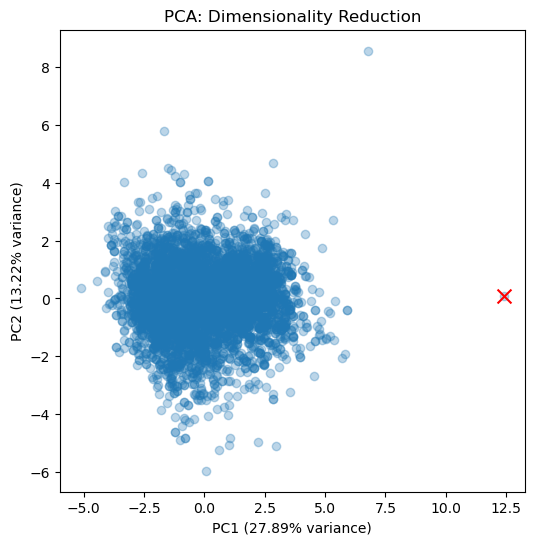

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
2781            7.8             0.965          0.6            65.8      0.074   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
2781                  8.0                 160.0  1.03898  3.39       0.69   

      alcohol  target  
2781     11.7       6  


In [ ]:
# YOUR CODE HERE
scaler = StandardScaler()
X_scaled = scaler.fit_transform(wine_quality)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
print(X_pca)

distances = np.sqrt(X_pca[:,0]**2 + X_pca[:,1]**2)
threshold = np.percentile(distances, 99.98)
outlier_indices = np.where(distances > threshold)[0]
print("Outlier row indices:", outlier_indices)

plt.figure(figsize=(6, 6))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.3)
plt.scatter(X_pca[outlier_indices,0], X_pca[outlier_indices,1],
            color='red', marker='x', s=100, label="Outliers")
plt.xlabel("PC1 (%.2f%% variance)" % (pca.explained_variance_ratio_[0]*100))
plt.ylabel("PC2 (%.2f%% variance)" % (pca.explained_variance_ratio_[1]*100))
plt.title("PCA: Dimensionality Reduction")
plt.show()

outlier_rows = wine_quality.iloc[outlier_indices]

print(outlier_rows)

YOUR ANSWERS HERE

### Generative AI Usage

If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the [generative AI policy](https://www.bu.edu/cds-faculty/culture-community/gaia-policy/).
If you did not use any generative AI tools, simply write NONE below.

YOUR ANSWER HERE